# Lab+Assignment: Credit Card Fraud Detection 

We used clustering last week to identify different groups of users. Now we want to detect cases of fraud.

## Task: automatically detect transactions that are likely to be frauds  

The Data for this assignment is fron the following  Kaggle challenge: https://www.kaggle.com/mlg-ulb/creditcardfraud

### Problem description
**Context**
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Data
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
#get the data
!git clone https://github.com/keuperj/DATA.git

fatal: destination path 'DATA' already exists and is not an empty directory.


In [2]:
!unzip DATA/creditcard.csv.zip

Archive:  DATA/creditcard.csv.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [6]:
import pandas as pd
data = pd.read_csv("creditcard.csv")

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Task 1: Wrangling + Pre-Processing
* check for missing values and NaNs / Infs
* check basic statistics and correlations, check the distribution of the variables -> are they Gaussian?
    * HINT: use pandas funtions and plots
* plot the lable distributions
* transform the data to NumPy train and test data sets

In [5]:
#check for Nans

data.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [10]:
#get basic stats
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


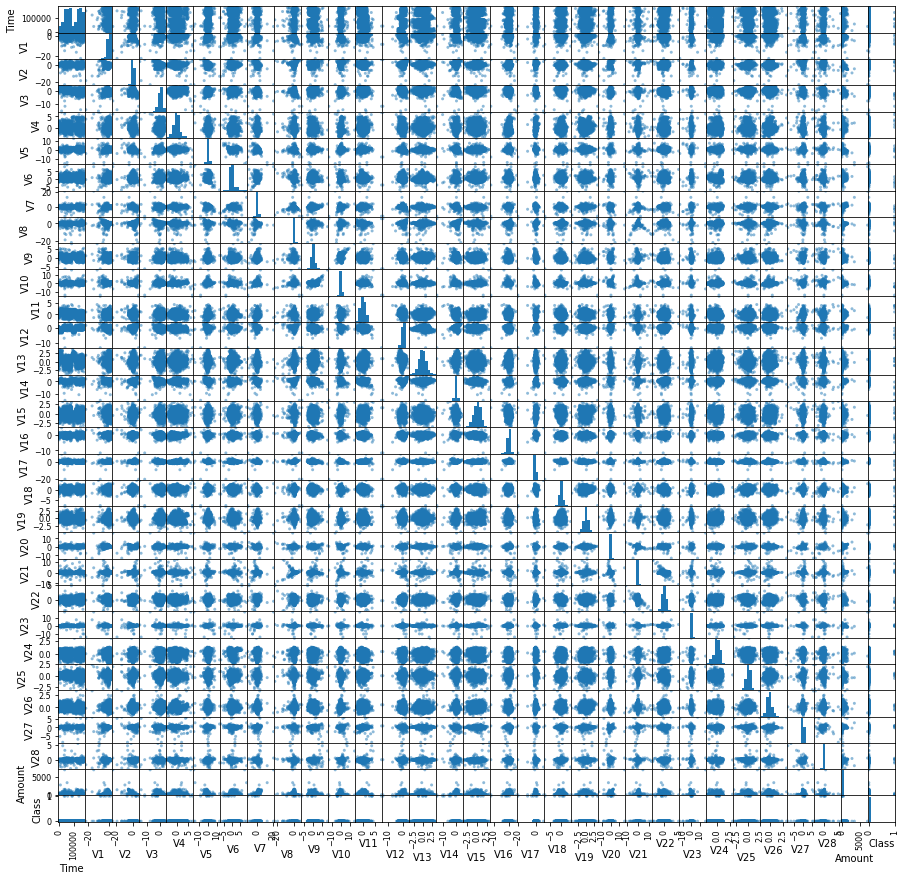

In [21]:
#plot distributions and correlations
#use only subset of data -> 1%
_=pd.plotting.scatter_matrix(data.iloc[::100, :], figsize=(15,15)) #get only every 100th row

In [9]:
#get data an lables as numpy
import numpy as np
y = data['Class'].to_numpy() #labels are a column

In [10]:
y.shape

(284807,)

In [11]:
X = data.drop(['Class'],axis=1).to_numpy() #remove lable for data

In [27]:
#split and transform to numpy

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
X_train.shape

(190820, 30)

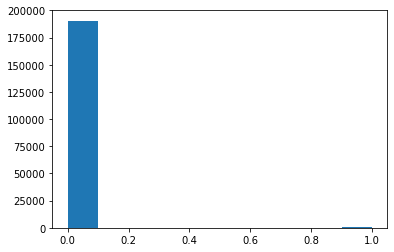

In [29]:
#class lables in train und test -
import matplotlib.pyplot as plt
_=plt.hist(y_train)


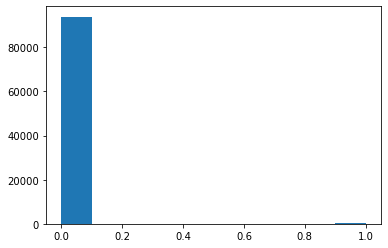

In [30]:
_=plt.hist(y_test)

### Task2: Train  Classifiers
* Train and evaluate  [Bayesian](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) and [linear Classifiers](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   
* Compare the results using [F1-Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) and a [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)




In [31]:
%%time
#linear classifier
from sklearn.linear_model import SGDClassifier
linear=SGDClassifier(max_iter=1000)#set max iterations on training
linear.fit(X_train,y_train)
y_linear = linear.predict(X_test)

CPU times: user 9.58 s, sys: 0 ns, total: 9.58 s
Wall time: 9.58 s


In [32]:
%%time
#Bayesian Classifier
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_bayes = bayes.predict(X_test)

CPU times: user 595 ms, sys: 67 ms, total: 662 ms
Wall time: 194 ms


In [33]:
from sklearn.metrics import f1_score
f1_score(y_linear, y_test)

0.0

In [34]:
f1_score(y_bayes, y_test)

0.22843822843822845

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_linear, y_test)

array([[93832,   149],
       [    6,     0]])

In [36]:
confusion_matrix(y_bayes, y_test)

array([[93227,    51],
       [  611,    98]])